In [1]:
#Import necessary libraries and packages
import warnings 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns

#Preferred settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [2]:
#Import Footprint and Biocapacity data
data = pd.read_csv('../Data/footprint-nfba-2019/data/nfa_2019_public_data.csv')
df = data

#Observe data shape and head
print(df.shape)
df.head()

(72186, 12)


,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,qscore
0,Armenia,1992,1,AreaPerCap,0.140292,0.199546,0.097188051,0.036888,0.029320,0.000000,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,483000.000000,687000.000000,334600,127000.000000,100943.000800,0.000000,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,0.159804,0.135261,0.084003213,0.013742,0.033398,0.000000,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,550176.242700,465677.972200,289207.1078,47311.551720,114982.279300,0.000000,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,0.387510,0.189462,1.26E-06,0.004165,0.033398,1.114093,1.728629e+00,3A


## Data Cleaning

In [3]:
#check random data chunk
data.sample(5)

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,qscore
50788,Timor-Leste,1987,176,BiocapPerCap,NaN,NaN,NaN,NaN,NaN,NaN,3.020969e+00,2A
64613,USSR,1965,228,BiocapTotGHA,NaN,NaN,NaN,NaN,NaN,NaN,1.126844e+09,2B
4776,Bangladesh,1975,16,AreaPerCap,0.131882,8.414451e-03,0.024232956,1.122221e-01,0.015382,0.0,2.921342e-01,3A
46979,Panama,1976,166,AreaTotHA,524741.930000,1.302258e+06,6620208.206,5.005600e+06,60299.400330,0.0,1.351311e+07,3A
33134,Kyrgyzstan,2012,113,EFProdPerCap,NaN,NaN,NaN,NaN,NaN,NaN,1.271831e+00,2A


We check the data-type of each column is of preferred data type

In [4]:
data.dtypes

country            object
year                int64
country_code        int64
record             object
crop_land         float64
grazing_land      float64
forest_land        object
fishing_ground    float64
built_up_land     float64
carbon            float64
total             float64
qscore             object
dtype: object

The Data type of the "country", "record", and "QScore" columns are of object type, which should be converted to String to be accessed or modified

In [5]:
#modify the datatype of country, record and QScore columns
data["country"] = data['country'].astype('string')
data["record"] = data['record'].astype('string')
data["qscore"] = data['qscore'].astype('string')

data.dtypes

country            string
year                int64
country_code        int64
record             string
crop_land         float64
grazing_land      float64
forest_land        object
fishing_ground    float64
built_up_land     float64
carbon            float64
total             float64
qscore             string
dtype: object

In order to carry out accurate pre-processing we have to first find out the number of Null Values in each column.

In [6]:
#check null values
print(data.isna().sum())
print(data.shape)

country               0
year                  0
country_code          0
record                0
crop_land         20472
grazing_land      20472
forest_land       20472
fishing_ground    20473
built_up_land     20473
carbon            20473
total                 9
qscore                1
dtype: int64
(72186, 12)


Since Entire rows contain NULL values, we have removed all such rows to clean our data. Rows were removed by removing rows that had less than 7 non-NULL cells.

In [7]:
#drop null values
df = data.dropna(axis=0, thresh=7)
#compression_opts = dict(method='zip', archive_name='out.csv')  
#df.to_csv('out.zip', index=False, compression=compression_opts) 

print(df.shape)
print(df.isna().sum())

(51714, 12)
country           0
year              0
country_code      0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    1
built_up_land     1
carbon            1
total             1
qscore            1
dtype: int64


The "qscore" is indicative of the reliability of Data. 
By dropping duplicate countries, we can realised for how reliable our overall data is for each country.

## Exploratory Data Analysis

(193, 12)


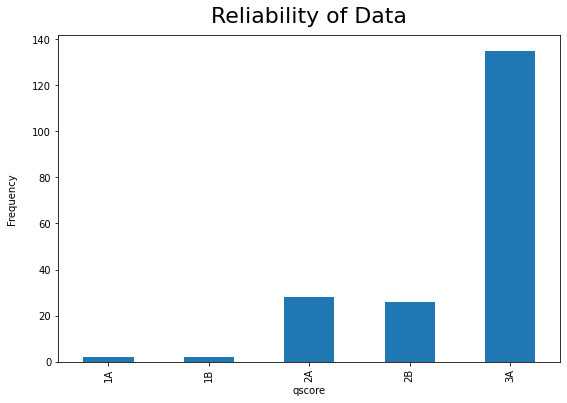

In [8]:
#drop duplicates
countryUniquedata = data.drop_duplicates(subset = "country")
countryUniqueCleaned = df.drop_duplicates(subset = "country")

print(countryUniquedata.shape)
#print(countryUnique.tail(20))

%matplotlib inline
#observe qscore
countryUniquedata.groupby('qscore').size().plot(kind = 'bar', figsize=(9, 6))
plt.ylabel("Frequency", labelpad=15)
plt.title("Reliability of Data", y=1.02, fontsize=22)
plt.show()
#countryUniqueCleaned.groupby('QScore').size().plot(kind = 'bar')

By Filtering our data only Ecological Footprint Consumption, we can observe how World Carbon Footprint level have changed from 1969-2016



Text(0.5, 1.02, 'World Carbon Footprint')

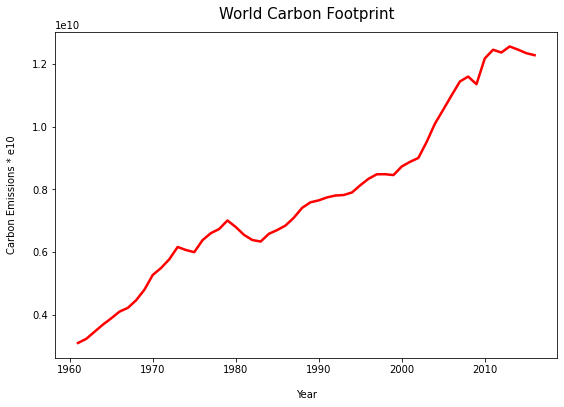

In [9]:
#data.loc[data.record == "EFConsTotGHA" & data.country == "World"]
#import matplotlib.pyplot as plt

worldData = data.loc[(data['record'] == "EFConsTotGHA") & (data['country'] == "World")]

worldData.sample(5)

#observe world carbon footprint
worldData.set_index('year')['carbon'].plot(figsize=(9, 6), linewidth=2.5, color='red')
plt.xlabel("Year", labelpad=15)
plt.ylabel("Carbon Emissions * e10", labelpad=15)
plt.title("World Carbon Footprint", y=1.02, fontsize=15)

The Ecological Footprint gives an idea on measure human demand on natural capital, that is the quantity of nature it takes to support people or an economy,  while the biocapacity is indicative of regenrative capacity of resources to meet demand in the ecosystem. 

Plotting both gives us the idea about the sustainability of our current usage.

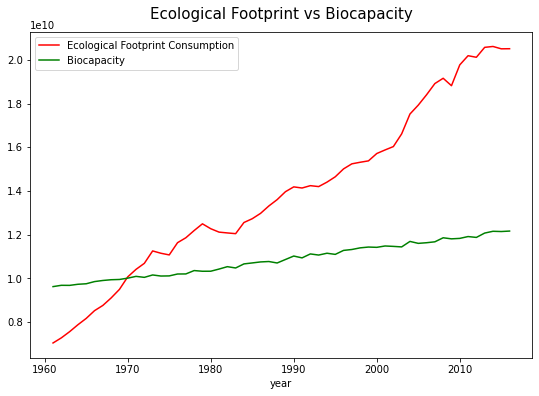

In [10]:
#data for analyzing ecological footprint and biocapacity 
worldEF = data.loc[(data['record'] == "EFConsTotGHA") & (data['country'] == "World")]
worldBC = data.loc[(data['record'] == "BiocapTotGHA") & (data['country'] == 'World')]

#worldEF.sample(5)
#worldBC.sample(5)

#observe Ecological Footprint vs Biocapacity
ax = plt.gca()
worldEF.plot(kind='line', x='year', y='total', color='red', figsize=(9,6), ax=ax)
worldBC.plot(kind='line', x='year', y='total', color='green', figsize=(9,6), ax=ax)
l=plt.legend()
l.get_texts()[0].set_text('Ecological Footprint Consumption')
l.get_texts()[1].set_text('Biocapacity')
plt.title("Ecological Footprint vs Biocapacity", y=1.02, fontsize=15)
plt.show()


Per Capita value of both measures gives an idea of resources consumed or are available per person. 
The large decrease in Biocapacity values are due to a lower increase in actual Biocapacity values from 1969.

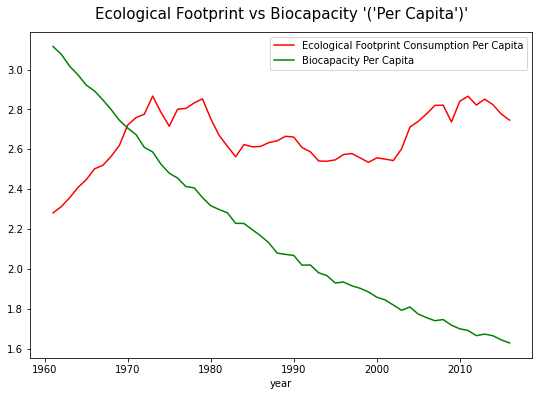

In [11]:
#data for analyzing ecological footprint and biocapacity 
worldEFCap = data.loc[(data['record'] == "EFConsPerCap") & (data['country'] == "World")]
worldBCCap = data.loc[(data['record'] == "BiocapPerCap") & (data['country'] == "World")]

#worldEFCap.sample(5)
#worldBCCap.sample(5)

#observe Ecological Footprint vs Biocapacity Per Capita
ax = plt.gca()
worldEFCap.plot(kind='line', x='year', y='total', color='red', figsize=(9,6), ax=ax)
worldBCCap.plot(kind='line', x='year', y='total', color='green', figsize=(9,6), ax=ax)
l=plt.legend()
l.get_texts()[0].set_text('Ecological Footprint Consumption Per Capita')
l.get_texts()[1].set_text('Biocapacity Per Capita')
plt.title("Ecological Footprint vs Biocapacity '('Per Capita')'", y=1.02, fontsize=15)
plt.show()


Countries with higher Ecological Footprint often cause a skew in data. Below, we've found contries with highest Ecological Footprint in 1970 and 2016

In [12]:
#data for analyzing highest ecological footprint in 1970 & 2016 
EFData1970 = df.loc[(df['record'] == "EFConsTotGHA") & (df['country'] != "World") & (df['year'] == 1970)]
EFData2016 = df.loc[(df['record'] == "EFConsTotGHA") & (df['country'] != "World") & (df['year'] == 2016)]

#grouped=EFData1970['total'].max()
#grouped.sort_index(ascending=True)

#EFData1970.sample(5)
#EFData2016.sample(5)

#observe countries with highest ecological footprint in 1970 and 2016 respectively
highEF1970 = EFData1970.sort_values(by = 'carbon', ascending = False)
highEF2016 = EFData2016.sort_values(by = 'carbon', ascending = False)

print(highEF1970[['country','year','carbon','total','qscore']].head())
print('  --------------------------------------------------------------------')
print(highEF2016.head())


                        country  year        carbon         total qscore
65551  United States of America  1970  1.572516e+09  2.172632e+09     3A
23101                   Germany  1970  3.820388e+08  5.355856e+08     3A
32149                     Japan  1970  3.171436e+08  5.292070e+08     3A
71367                     China  1970  2.898878e+08  8.902225e+08     3A
64903            United Kingdom  1970  2.577190e+08  3.929237e+08     3A
  --------------------------------------------------------------------
                        country  year  country_code        record  \
71735                     China  2016           351  EFConsTotGHA   
65919  United States of America  2016           231  EFConsTotGHA   
28501                     India  2016           100  EFConsTotGHA   
53503        Russian Federation  2016           185  EFConsTotGHA   
32517                     Japan  2016           110  EFConsTotGHA   

          crop_land  grazing_land  forest_land  fishing_ground  built_up_lan

We use scatterplot to observe how Ecological Footprint values have changed over time. This gives us an idea about how the production values have increase with time

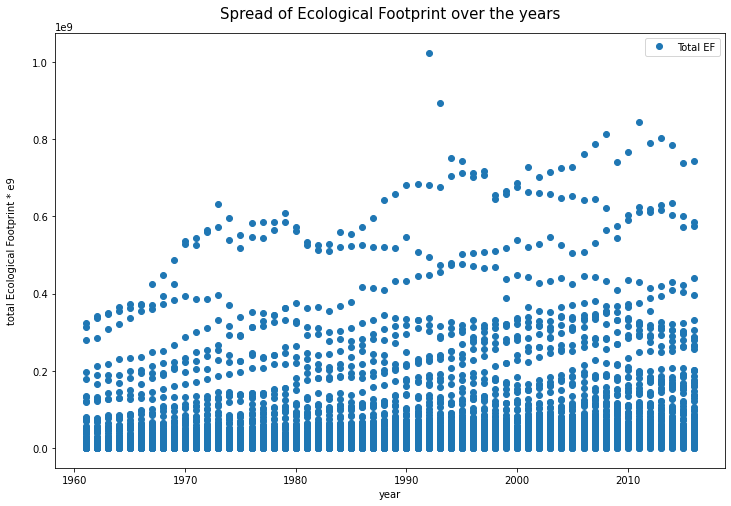

In [13]:
#data for ecological footprint spread over the years
#year = df.loc[(df['record'] == "EFConsTotGHA") & (df['country'] != "World") & (df['country'] != "China") & (df['country'] != " United States of America")]

country = ['China',  "United States of America", "India", "World"]
yearData = df.loc[(df['record'] == "EFConsTotGHA") & (~df['country'].isin(country))]
#print(yearData)
print()

#observe the spread of Ecological Footprint over the years
yearData.plot(x='year', y='total', style='o', figsize=(12,8))
plt.ylabel("total Ecological Footprint * e9", labelpad=15)
plt.title("Spread of Ecological Footprint over the years", y=1.02, fontsize=15)
L=plt.legend()
L.get_texts()[0].set_text('Total EF')

The plots below compares Ecological Footprint Consumption and BioCapacity values over time for data from all countries for the world category

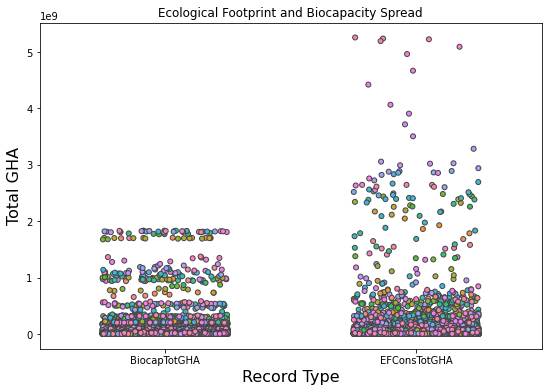

In [14]:
array = ['EFConsTotGHA', 'BiocapTotGHA']
recordData = df.loc[(df['record'].isin(array)) & (df['country'] != "World")]

#observe Ecological Footprint and Biocapacity over time
plt.figure(figsize=(9,6))
axis = sns.stripplot(x='record', y='total', data=recordData, jitter=0.25, linewidth=1, hue='year')
#axis.set_xticklabels(axis.get_xticklabels(), rotation=90)

axis.set_title('Ecological Footprint and Biocapacity Spread')
plt.xlabel("Record Type", size=16)
plt.ylabel("Total GHA", size=16)
axis.legend([],[], frameon=False)

The Boxplot supports the analysis that can be drawn form the plot above.
Removing the top 3 countries gives a better idea of how Ecological Footprint and Bio-Capacity is distributed between countries

Text(0, 0.5, 'Record Type')

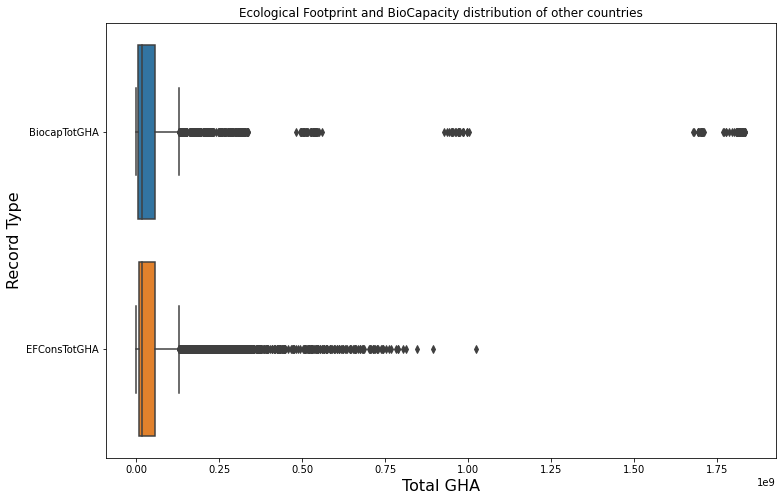

In [15]:
outliers = ['China',  "United States of America", "India", "World"]
array = ['EFConsTotGHA','BiocapTotGHA']

#observe distribution of Ecological Footprint and Biocapacity of other countries than top 3
plt.figure(figsize=(12,8))
boxData = df.loc[(df['record'].isin(array)) & (~df['country'].isin(outliers))]

sns.boxplot(x='total', y='record', data=boxData).set_title('Ecological Footprint and BioCapacity distribution of other countries')
plt.xlabel('Total GHA', size=16)
plt.ylabel('Record Type', size=16)


in order to see how the countries producing the most carbon Footprints have changed, we plot a pie chart to show the top 5 countries in 1970 and 2016, along with how the rest of the world compares with them

Text(0.5, 1.02, 'Carbon Footprint between countries for 2016')

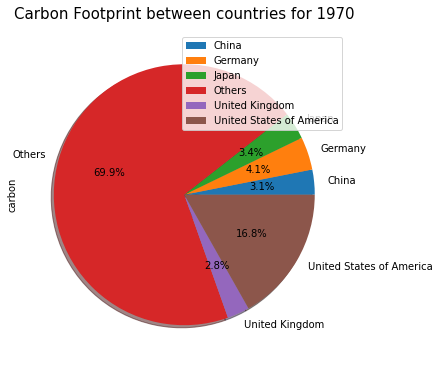

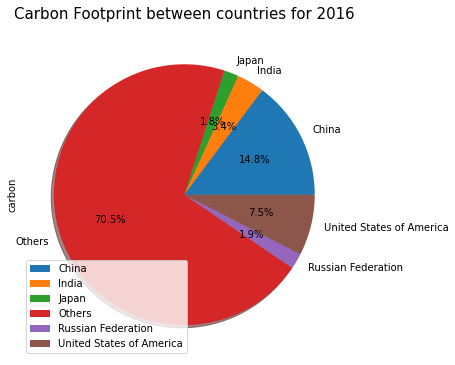

In [16]:
#Data of 1970
top51970 = ['Germany', 'China', 'Japan', 'United States of America', 'United Kingdom']
top61970 = df.loc[(df['record'] == "EFConsTotGHA") & (df['country'].isin(top51970)) & (df['year'] == 1970)]
othersRaw1970 = df.loc[(df['record'] == "EFConsTotGHA") & (~df['country'].isin(top51970)) & (df['year'] == 1970)]

#carbon footprint of non top 5 countries
totOtherCarbon1970 = othersRaw1970['carbon'].sum()

others1970 = pd.DataFrame({"country":['Others'],
                          "carbon":[totOtherCarbon1970]})
#represents top 5 and rest of the world
top61970=top61970.append(others1970, ignore_index=True)

#Data of 2016
top52016 = ['United States of America', 'China', 'India', "Japan", 'Russian Federation']
top62016 = df.loc[(df['record'] == "EFConsTotGHA") & (df['country'].isin(top52016)) & (df['year'] == 2016)]
othersRaw2016 = df.loc[(df['record'] == "EFConsTotGHA") & (~df['country'].isin(top52016)) & (df['year'] == 2016)]
totOtherCarbon2016 = othersRaw2016['carbon'].sum()

others2016 = pd.DataFrame({"country":['Others'],
                          "carbon":[totOtherCarbon2016]})
top62016=top62016.append(others2016, ignore_index=True)

#Observe Carbon Footprint between countries
#1970
top61970.groupby(['country']).sum().plot(kind='pie', y='carbon', legend=True, autopct='%1.1f%%', figsize=(9,6), shadow=True)
plt.title("Carbon Footprint between countries for 1970", y=1.02, fontsize=15)
#2016
top62016.groupby(['country']).sum().plot(kind='pie', y='carbon', legend=True, autopct='%1.1f%%', figsize=(9,6), shadow=True)
plt.title("Carbon Footprint between countries for 2016", y=1.02, fontsize=15)



Finding countries with highest/lowest Bipcapacity values in 1970 and 2016

In [17]:
#data for analyzing highest Biocapactiy in 1970 & 2016 
BCData1970 = df.loc[(df['record'] == "BiocapTotGHA") & (df['country'] != "World") & (df['year'] == 1970)]
BCData2016 = df.loc[(df['record'] == "BiocapTotGHA") & (df['country'] != "World") & (df['year'] == 2016)]

#grouped=EFData1970['total'].max()
#grouped.sort_index(ascending=True)

#EFData1970.sample(5)
#EFData2016.sample(5)

#observe countries with highest ecological footprint in 1970 and 2016 respectively
highBC1970 = BCData1970.sort_values(by = 'total', ascending = False)
highBC2016 = BCData2016.sort_values(by = 'total', ascending = False)

print(highBC1970[['country','year','total','qscore']].head(5))
print('  ------------------------------------------------------')
print(highBC2016[['country','year','total','qscore']].head(5))

                        country  year         total qscore
6795                     Brazil  1970  1.699972e+09     3A
65549  United States of America  1970  9.641094e+08     3A
71365                     China  1970  7.653499e+08     3A
9587                     Canada  1970  4.960570e+08     3A
2811                  Australia  1970  3.115044e+08     3A
  ------------------------------------------------------
                        country  year         total qscore
7163                     Brazil  2016  1.806630e+09     3A
71733                     China  2016  1.373629e+09     3A
65917  United States of America  2016  1.174980e+09     3A
53501        Russian Federation  2016  1.001545e+09     3A
28499                     India  2016  5.661150e+08     3A


Text(0.5, 1.02, 'Biocapacity between countries for 2016')

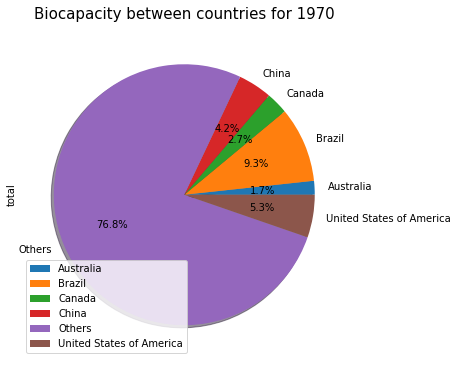

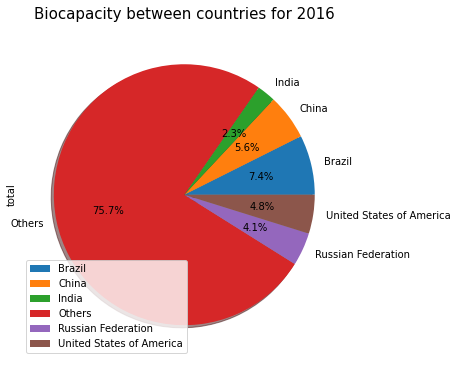

In [18]:
#Data of 1970
top51970 = ['Brazil', 'China', 'Canada', 'Australia', 'United States of America']
top61970 = df.loc[(df['record'] == "BiocapTotGHA") & (df['country'].isin(top51970)) & (df['year'] == 1970)]
othersRaw1970 = df.loc[(df['record'] == "BiocapTotGHA") & (~df['country'].isin(top51970)) & (df['year'] == 1970)]

#Biocapacity of non top 5 countries
totOtherCarbon1970 = othersRaw1970['total'].sum()

others1970 = pd.DataFrame({"country":['Others'],
                          "total":[totOtherCarbon1970]})
#represents top 5 and rest of the world
top61970=top61970.append(others1970, ignore_index=True)

#Data of 2016
top52016 = ['Brazil', 'China', 'United States of America', "India", 'Russian Federation']
top62016 = df.loc[(df['record'] == "BiocapTotGHA") & (df['country'].isin(top52016)) & (df['year'] == 2016)]
othersRaw2016 = df.loc[(df['record'] == "BiocapTotGHA") & (~df['country'].isin(top52016)) & (df['year'] == 2016)]
totOtherCarbon2016 = othersRaw2016['total'].sum()

others2016 = pd.DataFrame({"country":['Others'],
                          "total":[totOtherCarbon2016]})
top62016=top62016.append(others2016, ignore_index=True)

#Observe Biocapacity between countries
#1970
top61970.groupby(['country']).sum().plot(kind='pie', y='total', legend=True, autopct='%1.1f%%', figsize=(9,6), shadow=True)
plt.title("Biocapacity between countries for 1970", y=1.02, fontsize=15)
#2016
top62016.groupby(['country']).sum().plot(kind='pie', y='total', legend=True, autopct='%1.1f%%', figsize=(9,6), shadow=True)
plt.title("Biocapacity between countries for 2016", y=1.02, fontsize=15)



In order to gauge the co-relation between our variables, we used a correlation matrix represented through a heatmap. Different heatmaps for each type of record were drawn.

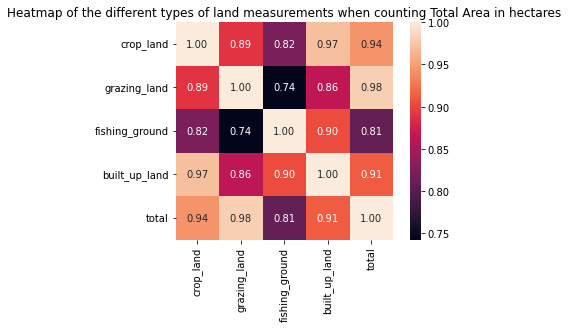

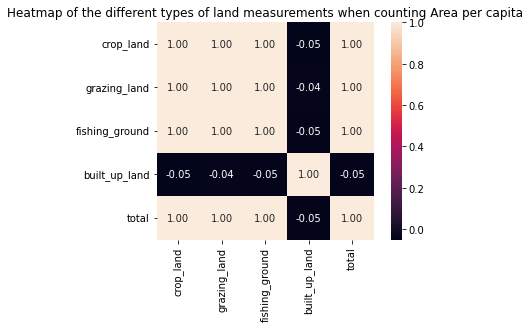

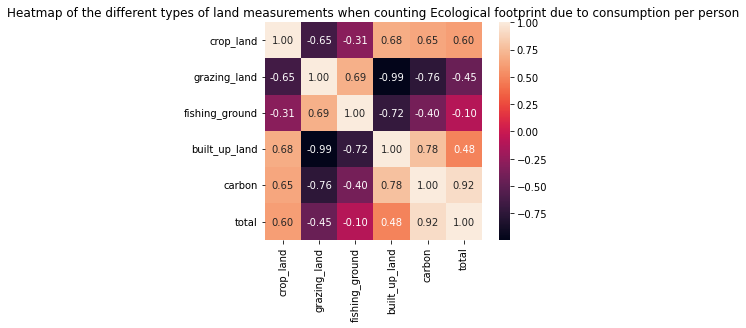

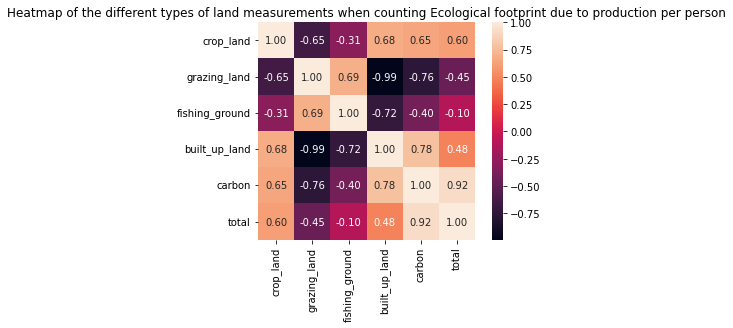

In [19]:
#data for world area, biocapacity, Ecological Footprint consumption and production per capita
worldDataArea = df.loc[(df['country'] == "World") & (df['record'] == "AreaTotHA") ,['crop_land','grazing_land','forest_land','fishing_ground','built_up_land','total']]
worldDataBiocap = df.loc[(df['country'] == "World") & (df['record'] == "AreaPerCap") ,['crop_land','grazing_land','forest_land','fishing_ground','built_up_land','total']]
worldDataEFConsPerCap = df.loc[(df['country'] == "World") & (df['record'] == "EFConsPerCap") ,['crop_land','grazing_land','forest_land','fishing_ground','built_up_land','carbon','total']]
worldDataEFProdPerCap = df.loc[(df['country'] == "World") & (df['record'] == "EFProdPerCap") ,['crop_land','grazing_land','forest_land','fishing_ground','built_up_land','carbon','total']]

#observe correlation 
corrmatA = worldDataArea.corr()
corrmatBC = worldDataBiocap.corr()
corrmatEFCP = worldDataEFConsPerCap.corr()
corrmatEFPP = worldDataEFProdPerCap.corr()

#observe heatmap
sns.heatmap(corrmatA,square=True,annot=True, fmt='.2f')
plt.title("Heatmap of the different types of land measurements when counting Total Area in hectares")
plt.show()
plt.title("Heatmap of the different types of land measurements when counting Area per capita")
sns.heatmap(corrmatBC,square=True,annot=True, fmt='.2f')
plt.show()
sns.heatmap(corrmatEFCP,square=True,annot=True, fmt='.2f')
plt.title("Heatmap of the different types of land measurements when counting Ecological footprint due to consumption per person")
plt.show()
sns.heatmap(corrmatEFPP,square=True,annot=True, fmt='.2f')
plt.title("Heatmap of the different types of land measurements when counting Ecological footprint due to production per person")
plt.show()

In order to gauge correlation of Ecological Footprint due to per capita consumption and production of Indian population, heatmaps are drawn

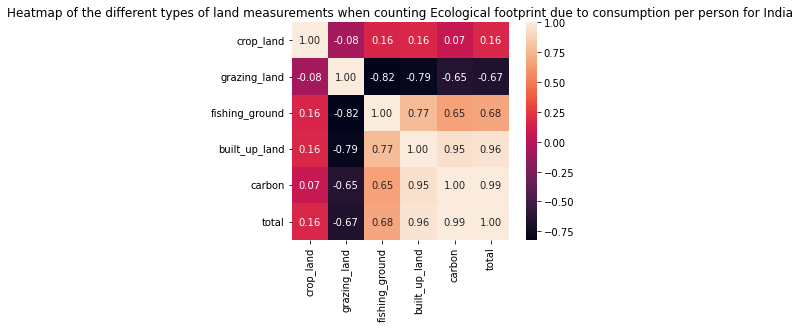

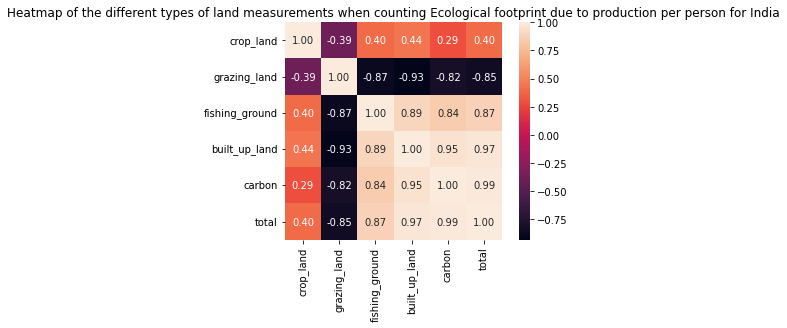

In [20]:
IndiaEFConsPerCap = df.loc[(df['country'] == "India") & (df['record'] == "EFConsPerCap") ,['crop_land','grazing_land','forest_land','fishing_ground','built_up_land','carbon','total']]
IndiaEFProdPerCap = df.loc[(df['country'] == "India") & (df['record'] == "EFProdPerCap") ,['crop_land','grazing_land','forest_land','fishing_ground','built_up_land','carbon','total']]

corrmatICP = IndiaEFConsPerCap.corr()
corrmatIPP = IndiaEFProdPerCap.corr()

sns.heatmap(corrmatICP,square=True,annot=True, fmt='.2f')
plt.title("Heatmap of the different types of land measurements when counting Ecological footprint due to consumption per person for India")
plt.show()

sns.heatmap(corrmatIPP,square=True,annot=True, fmt='.2f')
plt.title("Heatmap of the different types of land measurements when counting Ecological footprint due to production per person for India")
plt.show()

Ecological Footprint values in our data are distiguished on how resources are divided between different types of Land and Water resources. The following line graphs shows how these individual resources have changed with time for World and India

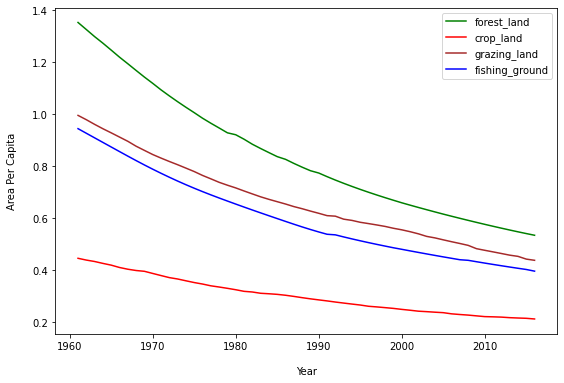

In [21]:
#observe ecological footprint values of world
ax = plt.gca()
worldDataAreaPerCapita = df.loc[(df['country'] == "World") & (df['record'] == "AreaPerCap") ,['year','crop_land','grazing_land','forest_land','fishing_ground','built_up_land']]
worldDataAreaPerCapita.plot(kind='line',x='year',y='forest_land', color='green', figsize=(9, 6), ax=ax)
worldDataAreaPerCapita.plot(kind='line',x='year',y='crop_land', color='red', figsize=(9, 6), ax=ax)
worldDataAreaPerCapita.plot(kind='line',x='year',y='grazing_land', color='brown', figsize=(9, 6), ax=ax)
worldDataAreaPerCapita.plot(kind='line',x='year',y='fishing_ground', color='blue', figsize=(9, 6), ax=ax)

plt.xlabel("Year", labelpad=15)
plt.ylabel("Area Per Capita", labelpad=15)
plt.show()

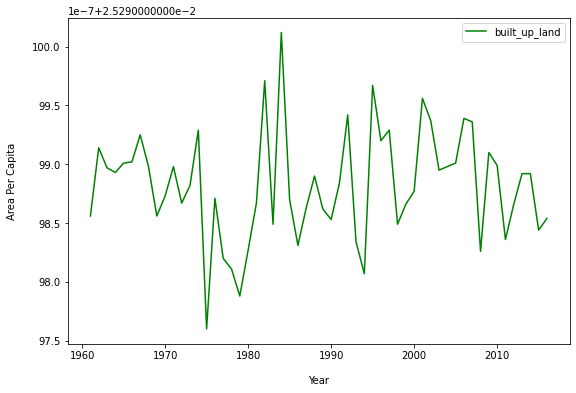

In [36]:
ax = plt.gca()
#observe total built up area of world
worldDataAreaPerCapita = df.loc[(df['country'] == "World") & (df['record'] == "AreaPerCap") ,['year','crop_land','grazing_land','forest_land','fishing_ground','built_up_land']]
worldDataAreaPerCapita.plot(kind='line',x='year',y='built_up_land', color='green', figsize=(9, 6), ax=ax)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Area Per Capita", labelpad=15)
plt.show()

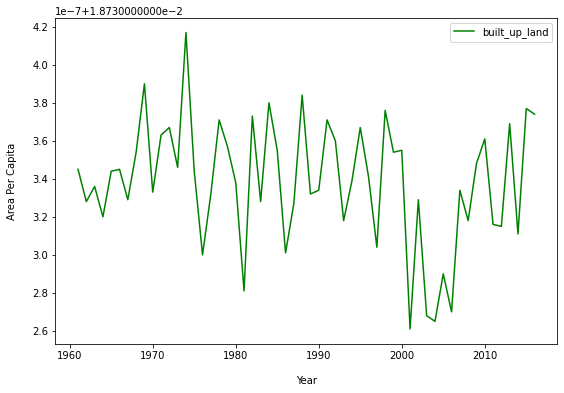

In [38]:
ax = plt.gca()
#observe total built up area of India
worldDataAreaPerCapita = df.loc[(df['country'] == "India") & (df['record'] == "AreaPerCap") ,['year','crop_land','grazing_land','forest_land','fishing_ground','built_up_land']]
worldDataAreaPerCapita.plot(kind='line',x='year',y='built_up_land', color='green', figsize=(9, 6), ax=ax)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Area Per Capita", labelpad=15)
plt.show()

Expressing the values per capita gives the following graph.



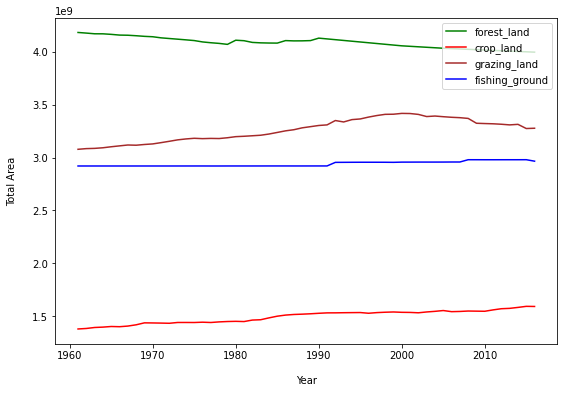

In [34]:
#observe per capita values of world
ax = plt.gca()
worldDataAreaLand = df.loc[(df['country'] == "World") & (df['record'] == "AreaTotHA") ,['year','crop_land','grazing_land','forest_land','fishing_ground','built_up_land']]
worldDataAreaLand.plot(kind='line',x='year',y='forest_land', color='green', figsize=(9, 6), ax=ax)
worldDataAreaLand.plot(kind='line',x='year',y='crop_land', color='red', figsize=(9, 6), ax=ax)
worldDataAreaLand.plot(kind='line',x='year',y='grazing_land', color='brown', figsize=(9, 6), ax=ax)
worldDataAreaLand.plot(kind='line',x='year',y='fishing_ground', color='blue', figsize=(9, 6), ax=ax)

plt.xlabel("Year", labelpad=15)
plt.ylabel("Total Area", labelpad=15)
plt.show()

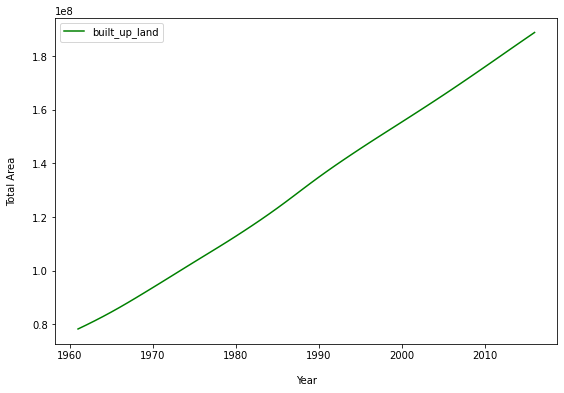

In [43]:
ax = plt.gca()
#Observe total per captia values of world
worldDataAreaLand = df.loc[(df['country'] == "World") & (df['record'] == "AreaTotHA") ,['year','crop_land','grazing_land','forest_land','fishing_ground','built_up_land']]
worldDataAreaLand.plot(kind='line',x='year',y='built_up_land', color='green', figsize=(9, 6), ax=ax)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Total Area", labelpad=15)
plt.show()

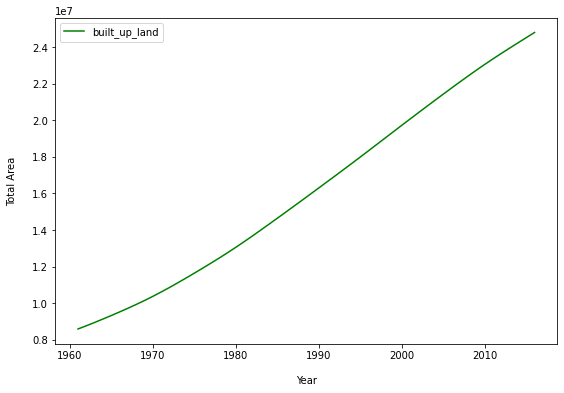

In [44]:
ax = plt.gca()
#Observe total per captia values of India
worldDataAreaLand = df.loc[(df['country'] == "India") & (df['record'] == "AreaTotHA") ,['year','crop_land','grazing_land','forest_land','fishing_ground','built_up_land']]
worldDataAreaLand.plot(kind='line',x='year',y='built_up_land', color='green', figsize=(9, 6), ax=ax)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Total Area", labelpad=15)
plt.show()